In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# Load the data
atheletes_csv = pd.read_csv('athlete_events.csv')
regions_csv = pd.read_csv('noc_regions.csv')

In [71]:
# Clean the data
athletes_columns_to_be_cleaned = ['Age']
atheletes_csv = atheletes_csv.dropna(axis=0, subset=athletes_columns_to_be_cleaned)

# Make sure the first letter of the columns is capitalized, but if a column has multiple capital letters, keep it like that
# This is to make sure the columns are consistent

regions_columns_to_be_cleaned = ['Continent']
regions_csv = regions_csv.dropna(axis=0, subset=regions_columns_to_be_cleaned)
# We cleaned the data so every country is part of the 5 continents that participate in the olympic games
# Europe, Asia, Africa, America, Oceania
regions_order = ['Europe', 'Asia', 'Africa', 'America', 'Oceania']

# Merge the data
merged_data = pd.merge(atheletes_csv, regions_csv, on='NOC')



In [72]:
# Utility variables
medal_data = merged_data.dropna(axis=0, subset=['Medal'])
medal_count = medal_data['Continent'].value_counts()
medal_count = medal_count.reindex(regions_order)

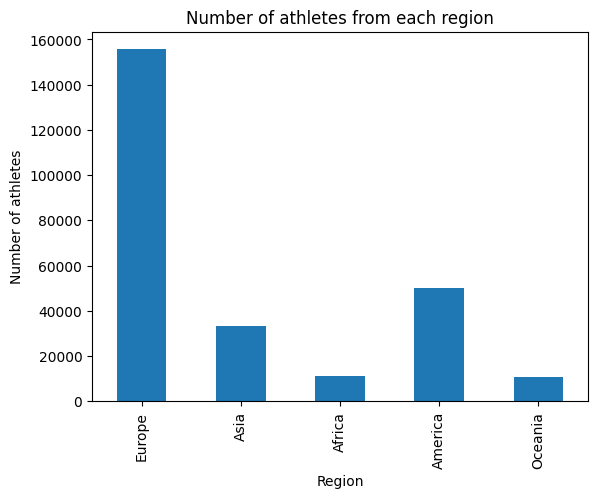

In [73]:
# 2.1
# ### 2.1. From which region do the most athletes come from?

# Count the number of athletes from each region
athletes_count = merged_data['Continent'].value_counts()
athletes_count = athletes_count.reindex(regions_order)
athletes_count.plot(kind='bar')
plt.title('Number of athletes from each region')
plt.xlabel('Region')
plt.ylabel('Number of athletes')
plt.show()

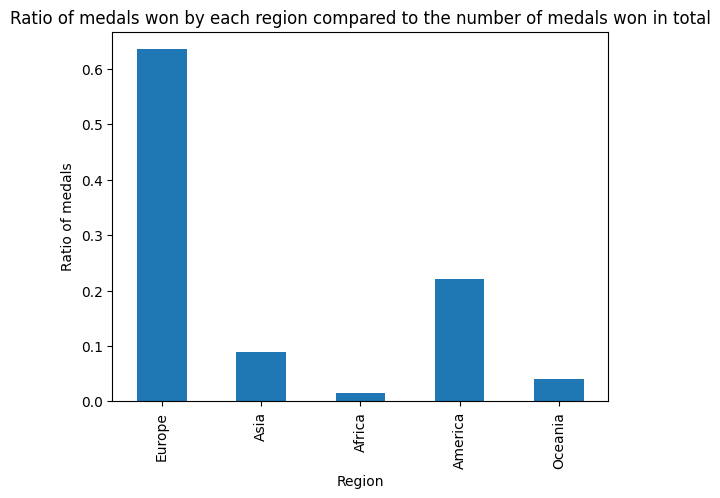

In [74]:
# 2.2
# Show the ratio of medals won by each country compared to the number of medals won in total
total_medals = medal_count.sum()
medal_ratio = medal_count / total_medals
medal_ratio = medal_ratio.reindex(regions_order)
medal_ratio.plot(kind='bar')
plt.title('Ratio of medals won by each region compared to the number of medals won in total')
plt.xlabel('Region')
plt.ylabel('Ratio of medals')
plt.show()

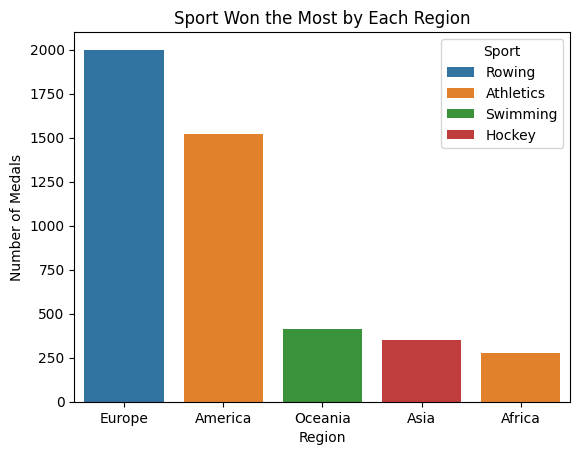

In [75]:
# 2.3
### 2.3. Which sport is won the most by which region?
# Count the number of medals won by each region in each sport

medals_won_by_each_region_in_each_sport = merged_data.dropna(axis=0, subset=['Medal']).groupby(['Continent', 'Sport'])['Medal'].count().reset_index()
medals_won_by_each_region_in_each_sport = medals_won_by_each_region_in_each_sport.sort_values('Medal', ascending=False).drop_duplicates(subset='Continent', keep='first')
fig, ax = plt.subplots()
sns.barplot(x='Continent', y='Medal', data=medals_won_by_each_region_in_each_sport, hue='Sport', ax=ax)
ax.set_title('Sport Won the Most by Each Region')
ax.set_xlabel('Region')
ax.set_ylabel('Number of Medals')
plt.show()



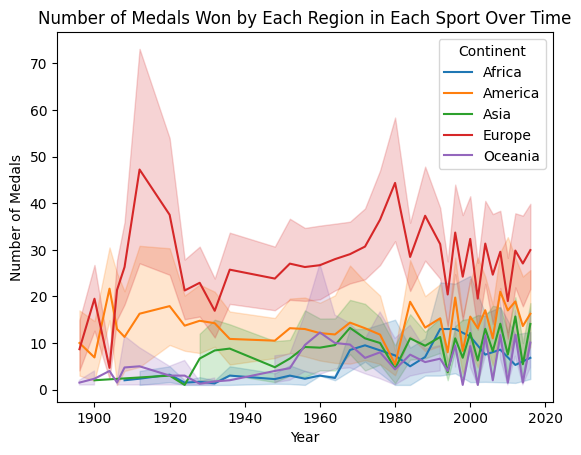

In [78]:
# 2.4
# ### 2.4. What are the most successful sports for each region, and how do these trends change over time?
# Line plot of the number of medals won by each region in each sport over time

medals_won_by_each_region_in_each_sport_over_time = merged_data.dropna(axis=0, subset=['Medal']).groupby(['Continent', 'Sport', 'Year'])['Medal'].count().reset_index()
fig, ax = plt.subplots()
sns.lineplot(x='Year', y='Medal', data=medals_won_by_each_region_in_each_sport_over_time, hue='Continent', ax=ax)
ax.set_title('Number of Medals Won by Each Region in Each Sport Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Medals')
plt.show()
